<a href="https://colab.research.google.com/github/ezta91/Esther-Erommonsele/blob/main/Sales_Trends_(Cosmetic_Store).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('cosmetics_sales_data.csv')
print(df)

     Sales Person      Country                  Product        Date  \
0     Lucas Verma       Canada            Aloe Vera Gel  2022-04-30   
1     Ethan Reddy           UK            Aloe Vera Gel  2022-01-25   
2    Ananya Gupta        India        Body Butter Cream  2022-08-22   
3    Ananya Gupta  New Zealand  Salicylic Acid Cleanser  2022-08-26   
4     Sophia Nair           UK        Body Butter Cream  2022-05-19   
..            ...          ...                      ...         ...   
369    Liam Patel    Australia          Vitamin C Cream  2022-05-30   
370  Ananya Gupta  New Zealand     Hydrating Face Serum  2022-05-07   
371  Ananya Gupta          USA            Lip Balm Pack  2022-06-21   
372   Sophia Nair  New Zealand  Salicylic Acid Cleanser  2022-08-16   
373    Liam Patel           UK          Vitamin C Cream  2022-08-17   

     Amount ($)  Boxes Shipped  
0       7897.13            358  
1      16376.88            449  
2       5599.68            264  
3       2966.47

In [18]:
df.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484


In [19]:
df.tail()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
369,Liam Patel,Australia,Vitamin C Cream,2022-05-30,5575.62,371
370,Ananya Gupta,New Zealand,Hydrating Face Serum,2022-05-07,12563.44,420
371,Ananya Gupta,USA,Lip Balm Pack,2022-06-21,4983.24,143
372,Sophia Nair,New Zealand,Salicylic Acid Cleanser,2022-08-16,782.09,19
373,Liam Patel,UK,Vitamin C Cream,2022-08-17,17614.90,386


In [22]:
print(df)

     Sales Person      Country                  Product        Date  \
0     Lucas Verma       Canada            Aloe Vera Gel  2022-04-30   
1     Ethan Reddy           UK            Aloe Vera Gel  2022-01-25   
2    Ananya Gupta        India        Body Butter Cream  2022-08-22   
3    Ananya Gupta  New Zealand  Salicylic Acid Cleanser  2022-08-26   
4     Sophia Nair           UK        Body Butter Cream  2022-05-19   
..            ...          ...                      ...         ...   
369    Liam Patel    Australia          Vitamin C Cream  2022-05-30   
370  Ananya Gupta  New Zealand     Hydrating Face Serum  2022-05-07   
371  Ananya Gupta          USA            Lip Balm Pack  2022-06-21   
372   Sophia Nair  New Zealand  Salicylic Acid Cleanser  2022-08-16   
373    Liam Patel           UK          Vitamin C Cream  2022-08-17   

     Amount ($)  Boxes Shipped  
0       7897.13            358  
1      16376.88            449  
2       5599.68            264  
3       2966.47

In [23]:
df.isna().sum

<bound method DataFrame.sum of      Sales Person  Country  Product   Date  Amount ($)  Boxes Shipped
0           False    False    False  False       False          False
1           False    False    False  False       False          False
2           False    False    False  False       False          False
3           False    False    False  False       False          False
4           False    False    False  False       False          False
..            ...      ...      ...    ...         ...            ...
369         False    False    False  False       False          False
370         False    False    False  False       False          False
371         False    False    False  False       False          False
372         False    False    False  False       False          False
373         False    False    False  False       False          False

[374 rows x 6 columns]>

In [34]:
print(df.describe())

         Amount ($)  Boxes Shipped
count    374.000000     374.000000
mean    7778.353262     249.072193
std     5655.378093     144.235296
min      119.820000      10.000000
25%     3325.250000     140.000000
50%     6513.655000     246.000000
75%    11331.897500     364.000000
max    23977.480000     499.000000


In [25]:
print(df.shape)

(374, 6)


In [26]:
print(df.columns.tolist())

['Sales Person', 'Country', 'Product', 'Date', 'Amount ($)', 'Boxes Shipped']


In [28]:
print(df.dtypes)

Sales Person      object
Country           object
Product           object
Date              object
Amount ($)       float64
Boxes Shipped      int64
dtype: object


In [32]:
print(df.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount ($)       0
Boxes Shipped    0
dtype: int64


In [33]:
df.duplicated().sum()

np.int64(0)

In [41]:
#monthly sales trends
#first convert date
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'])

0     2022-04-30
1     2022-01-25
2     2022-08-22
3     2022-08-26
4     2022-05-19
         ...    
369   2022-05-30
370   2022-05-07
371   2022-06-21
372   2022-08-16
373   2022-08-17
Name: Date, Length: 374, dtype: datetime64[ns]


In [43]:
#monthly sales trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))[['Amount ($)', 'Boxes Shipped']].sum()
print(monthly_sales)

         Amount ($)  Boxes Shipped
Date                              
2022-01   359762.51          11795
2022-02   214024.56           6963
2022-03   484101.59          15167
2022-04   452650.04          14483
2022-05   396609.09          12583
2022-06   367001.65          11536
2022-07   359655.73          10852
2022-08   275298.95           9774


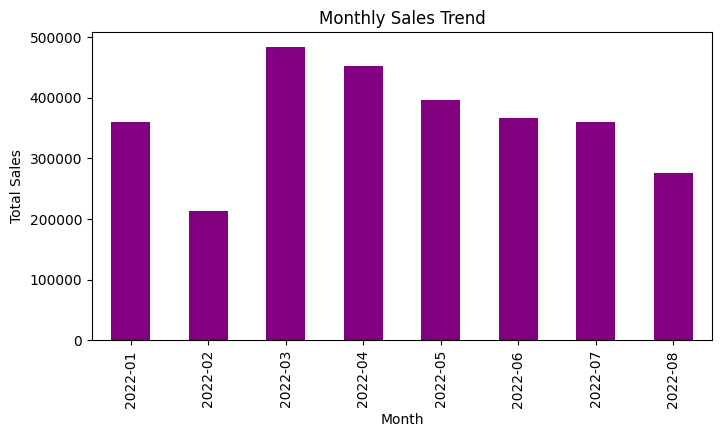

In [49]:
#monthly sales trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount ($)'].sum()
monthly_sales.plot(kind='bar', figsize=(8, 4), color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

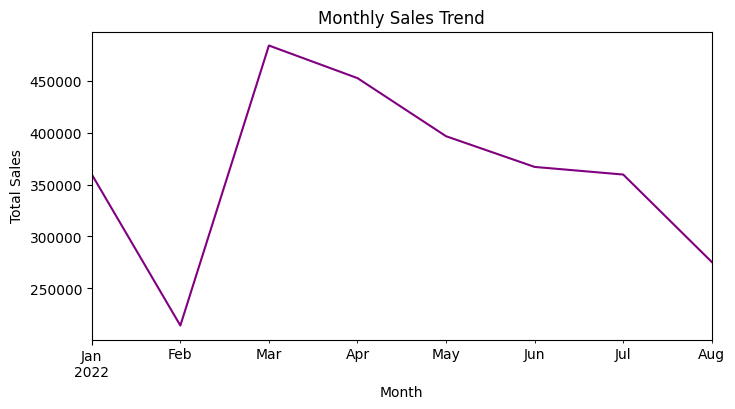

In [102]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount ($)'].sum()
monthly_sales.plot(kind='line', figsize=(8, 4), color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

/tmp/ipython-input-64-809565680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False).index,


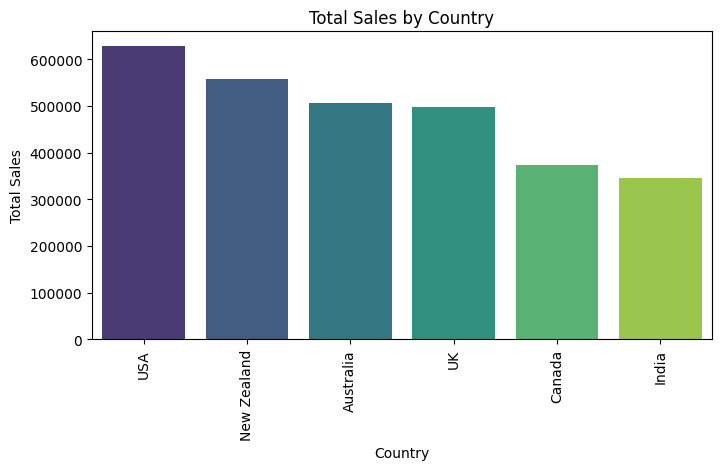

In [64]:
#Sales by country
plt.figure(figsize=(8, 4))
sns.barplot(x=df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False).index,
            y=df.groupby('Country')['Amount ($)'].sum().sort_values(ascending=False), palette= 'viridis')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-85-3799732970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Product')['Amount ($)'].sum().sort_values(ascending=False).index,


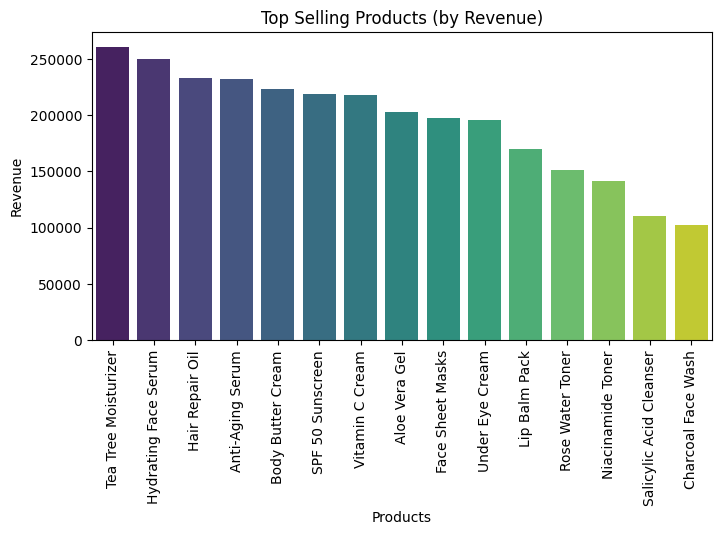

In [85]:
#Top selling products
plt.figure(figsize=(8, 4))
sns.barplot(x=df.groupby('Product')['Amount ($)'].sum().sort_values(ascending=False).index,
            y=df.groupby('Product')['Amount ($)'].sum().sort_values(ascending=False), palette= 'viridis')
plt.title('Top Selling Products (by Revenue)')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-84-2207694101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index, palette="pastel")


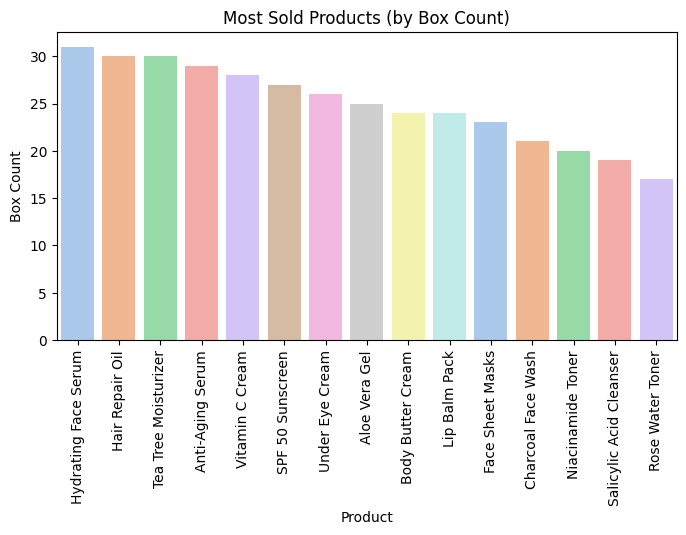

In [84]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index, palette="pastel")
plt.title("Most Sold Products (by Box Count)")
plt.ylabel("Box Count")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-97-2740756399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Sales Person')['Amount ($)'].sum().sort_values(ascending=False).index,


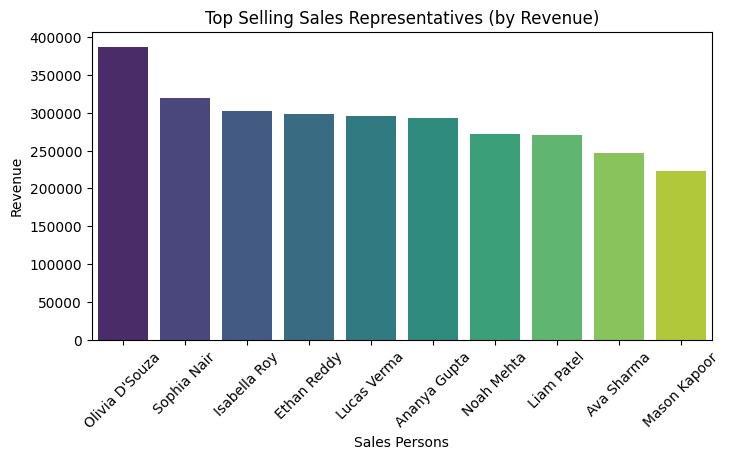

In [97]:
#Top selling sales representative
plt.figure(figsize=(8, 4))
sns.barplot(x=df.groupby('Sales Person')['Amount ($)'].sum().sort_values(ascending=False).index,
            y=df.groupby('Sales Person')['Amount ($)'].sum().sort_values(ascending=False), palette= 'viridis')
plt.title('Top Selling Sales Representatives (by Revenue)')
plt.xlabel('Sales Persons')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-96-437138188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Sales Person'], y=df['Amount ($)'], palette= 'Set3')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Lucas Verma'),
  Text(1, 0, 'Ethan Reddy'),
  Text(2, 0, 'Ananya Gupta'),
  Text(3, 0, 'Sophia Nair'),
  Text(4, 0, 'Isabella Roy'),
  Text(5, 0, 'Noah Mehta'),
  Text(6, 0, "Olivia D'Souza"),
  Text(7, 0, 'Ava Sharma'),
  Text(8, 0, 'Liam Patel'),
  Text(9, 0, 'Mason Kapoor')])

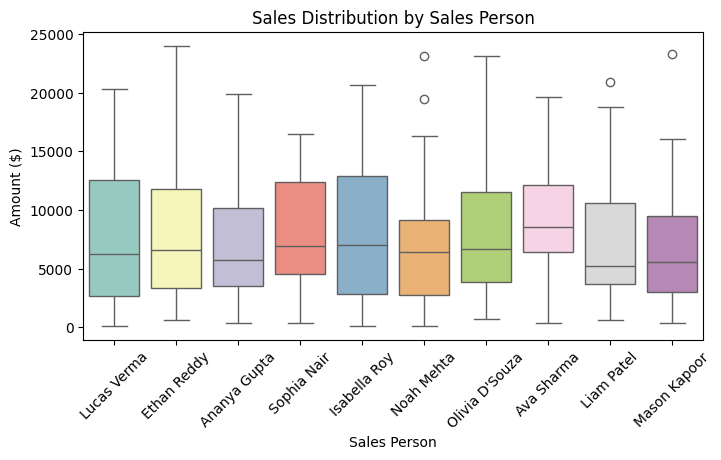

In [96]:
#Sales distribution by sales person
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Sales Person'], y=df['Amount ($)'], palette= 'Set3')
plt.title('Sales Distribution by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

In [98]:
#Correlation
correlation = df[['Amount ($)', 'Date']].corr()
print(correlation)

            Amount ($)      Date
Amount ($)    1.000000 -0.092478
Date         -0.092478  1.000000


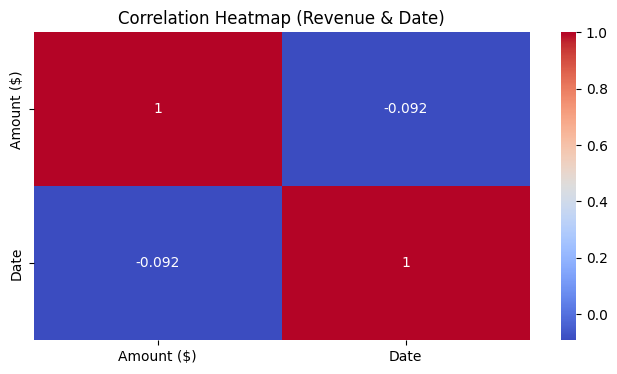

In [100]:
#Correlation map
plt.figure(figsize=(8, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Revenue & Date)')
plt.show()

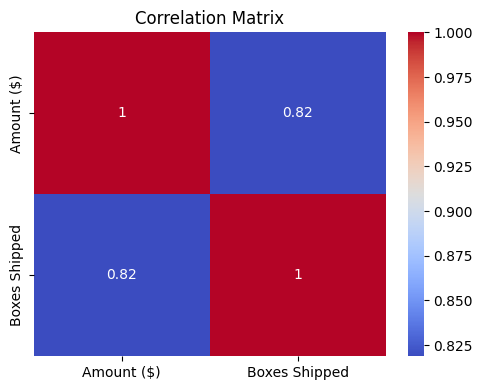

In [101]:
#correlation matrix
plt.figure(figsize=(5,4))
sns.heatmap(df[['Amount ($)', 'Boxes Shipped']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()